In [1]:
import numpy as np
import matplotlib.pyplot as plt

from agent import Agent

Using device:  cuda:0


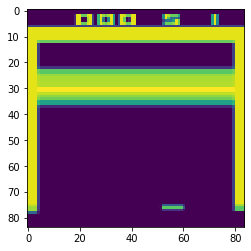

In [2]:
game_name = 'Breakout-v0' # 'VideoPinball-v0'
device = 'cuda:0'

agent = Agent(game_name, device)

plt.imshow(agent.sanity_check_screen())

In [3]:
metrics = agent.train()

Episode  0
Episode  1
Episode  2
Episode  3
Episode  4
Episode  5
Episode  6
Episode  7
Episode  8
Episode  9
Episode  10
Episode  11
Episode  12
Episode  13
Episode  14
Episode  15
Episode  16
Episode  17
Episode  18
Episode  19
Episode  20
Episode  21
Episode  22
Episode  23
Episode  24
Episode  25
Episode  26
Episode  27
Episode  28
Episode  29
Episode  30
Episode  31
Episode  32
Episode  33
Episode  34
Episode  35
Episode  36
Episode  37
Episode  38
Episode  39
Episode  40
Episode  41
Episode  42
Episode  43
Episode  44
Episode  45
Episode  46
Episode  47
Episode  48
Episode  49
Episode  50
Episode  51
Episode  52
Episode  53
Episode  54
Episode  55
Episode  56
Episode  57
Episode  58
Episode  59
Episode  60
Episode  61
Episode  62
Episode  63
Episode  64
Episode  65
Episode  66
Episode  67
Episode  68
Episode  69
Episode  70
Episode  71
Episode  72
Episode  73
Episode  74
Episode  75
Episode  76
Episode  77
Episode  78
Episode  79
Episode  80
Episode  81
Episode  82
Episode  83
Ep

In [4]:
rewards = metrics['rewards']
losses = metrics['losses']
steps = metrics['steps']

assert len(rewards) == len(losses) == len(steps)

episodes_info = list(zip(rewards, losses, steps))
for i, (reward, loss, step) in enumerate(episodes_info):
    print('Episode %d :' % i)
    print('Step - ', step)
    print('Reward - ', reward)
    print('Loss - ', loss)
    print('\n')

Episode 0 :
Step -  134
Reward -  0.0
Loss -  0.45554032921791077


Episode 1 :
Step -  425
Reward -  4.0
Loss -  0.3411547541618347


Episode 2 :
Step -  556
Reward -  0.0
Loss -  0.4417800307273865


Episode 3 :
Step -  792
Reward -  3.0
Loss -  0.3903617858886719


Episode 4 :
Step -  982
Reward -  1.0
Loss -  0.41110700368881226


Episode 5 :
Step -  1231
Reward -  2.0
Loss -  0.4065132141113281


Episode 6 :
Step -  1357
Reward -  0.0
Loss -  0.38501423597335815


Episode 7 :
Step -  1533
Reward -  1.0
Loss -  0.43124672770500183


Episode 8 :
Step -  1720
Reward -  1.0
Loss -  0.40957868099212646


Episode 9 :
Step -  1925
Reward -  2.0
Loss -  0.43482816219329834


Episode 10 :
Step -  2154
Reward -  2.0
Loss -  0.434406042098999


Episode 11 :
Step -  2339
Reward -  1.0
Loss -  0.4189312160015106


Episode 12 :
Step -  2473
Reward -  0.0
Loss -  0.5377793312072754


Episode 13 :
Step -  2601
Reward -  0.0
Loss -  0.4239448010921478


Episode 14 :
Step -  2737
Reward -  0.0
Loss

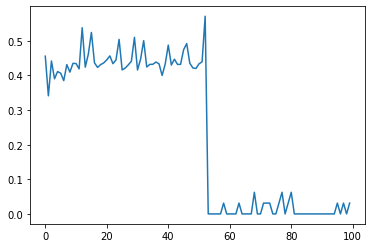

In [5]:
plt.plot(range(len(losses)), losses)
plt.show()

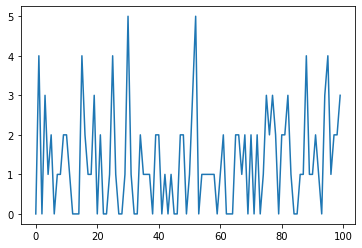

In [6]:
plt.plot(range(len(rewards)), rewards)
plt.show()